In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [47]:
data = pd.read_csv('Adidas Vs Nike.csv')

In [48]:
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [49]:
data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

Description and last visited columns are irrelevent, therefore we delete them 

In [50]:
del data['Last Visited']

In [51]:
del data['Description']

In [52]:
data.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [53]:
data.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [54]:
print(data.columns)

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')


### Changing the column names to work with SQLite3 

In [55]:
data.columns = ['product_name', 'product_id', 'listing_price', 'sale_price', 'discount', 'brand', 'rating', 'reviews']
print(data.columns)

Index(['product_name', 'product_id', 'listing_price', 'sale_price', 'discount',
       'brand', 'rating', 'reviews'],
      dtype='object')


In [56]:
data.value_counts('brand')

brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
dtype: int64

In [57]:
data ['brand'] = data['brand'].str.replace('Adidas CORE / NEO', 'Adidas')
data ['brand'] = data['brand'].str.replace('Adidas ORIGINALS', 'Adidas')
data ['brand'] = data['brand'].str.replace('Adidas SPORT PERFORMANCE', 'Adidas')
data ['brand'] = data['brand'].str.replace('Adidas Adidas ORIGINALS', 'Adidas')
data ['brand'] = data['brand'].str.replace('Adidas Adidas', 'Adidas')

In [58]:
shoes_data_csv = data.to_csv("shoe_data_2.csv")

In [59]:
Path('shoe_data.db').touch()
data_shoe_conn = sqlite3.connect('shoe_data.db')
data_shoe_cursor = data_shoe_conn.cursor()

In [60]:
data.to_sql('data', data_shoe_conn, if_exists='append', index=False)

3268

#### EDA using SQLite3 

In [61]:
query = pd.read_sql(''' SELECT * FROM data ''', data_shoe_conn)
query

,product_name,product_id,listing_price,sale_price,discount,brand,rating,reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [62]:
count_nike_query = pd.read_sql('''select count(product_name) as total_nike from data
                                   where Brand == 'Nike' ''', data_shoe_conn)
count_nike_query

,total_nike
0,643


In [63]:
count_adidas_query = pd.read_sql('''select count(product_name) as total_addidas from data
                                     where Brand == 'Adidas' ''', data_shoe_conn)
count_adidas_query

,total_addidas
0,2625


In [64]:
nike_avg_price = pd.read_sql('''SELECT count(product_name) as Total,
                                AVG(listing_price) AS Average_List_Price, AVG(sale_price) AS Average_sale_price
                                FROM data
                                WHERE brand == 'Nike' ''', data_shoe_conn )
nike_avg_price 

,Total,Average_List_Price,Average_sale_price
0,643,3875.762053,10213.676516


In [69]:
brand_avg_price = pd.read_sql('''SELECT brand, count(product_name) as Total,
                                AVG(listing_price) AS Average_List_Price, AVG(sale_price) AS Average_sale_price
                                FROM data
                                GROUP BY brand''', data_shoe_conn)
brand_avg_price

,brand,Total,Average_List_Price,Average_sale_price
0,Adidas,2625,7600.980952,5135.004190
1,Nike,643,3875.762053,10213.676516


<AxesSubplot:xlabel='brand', ylabel='Average_sale_price'>

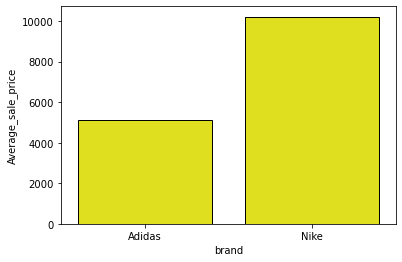

In [73]:
sns.barplot(y = 'Average_sale_price', x = 'brand', data = brand_avg_price, color = 'yellow', edgecolor='black')

In [74]:
nike_price = pd.read_sql('''SELECT listing_price, sale_price 
                        FROM data 
                        WHERE brand == 'Nike' ''', data_shoe_conn)
nike_price

,listing_price,sale_price
0,0,7495
1,0,7495
2,0,9995
3,0,9995
4,0,9995
...,...,...
638,15995,12797
639,4995,3497
640,8495,5947
641,0,16995


In [75]:
adidas_avg_price = pd.read_sql('''SELECT listing_price, sale_price
                                FROM data
                                WHERE brand == 'Adidas' ''', data_shoe_conn )
adidas_avg_price

,listing_price,sale_price
0,14999,7499
1,7599,3799
2,999,599
3,6999,3499
4,7999,3999
...,...,...
2620,10999,10999
2621,6999,6999
2622,3999,3999
2623,7999,7999


In [76]:
adidas_discount = pd.read_sql('''SELECT discount
                            FROM data WHERE brand == 'Adidas' ''', data_shoe_conn)
adidas_discount

,discount
0,50
1,50
2,40
3,50
4,50
...,...
2620,0
2621,0
2622,0
2623,0


In [77]:
discount_query = pd.read_sql('''SELECT discount, brand FROM data''', data_shoe_conn)
discount_query

,discount,brand
0,50,Adidas
1,50,Adidas
2,40,Adidas
3,50,Adidas
4,50,Adidas
...,...,...
3263,0,Nike
3264,0,Nike
3265,0,Nike
3266,0,Nike


In [78]:
# Top 5 products of Nike 

top_nike = pd.read_sql('''SELECT DISTINCT (product_name),listing_price, sale_price, discount, rating, reviews FROM data 
                        WHERE brand == 'Nike'
                        ORDER BY rating DESC, reviews DESC
                        LIMIT 5''', data_shoe_conn)
top_nike

,product_name,listing_price,sale_price,discount,rating,reviews
0,Nike Air Max 90,0,9995,0,5.0,9
1,Nike Air Force 1 '07 LV8,0,7595,0,5.0,6
2,Nike Air Zoom Wildhorse 5,0,8995,0,5.0,6
3,Nike Air Max 720 (OBJ),16995,13597,0,5.0,5
4,Nike Air Zoom Pegasus 36 Premium Rise,10995,6597,0,5.0,5


<AxesSubplot:xlabel='sale_price', ylabel='product_name'>

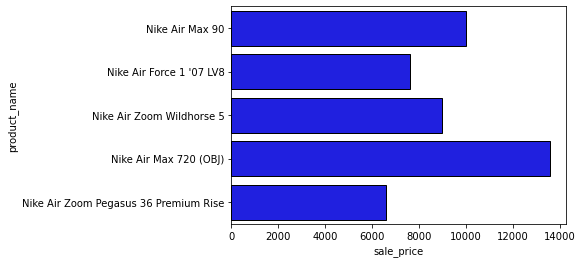

In [82]:
sns.barplot(x = 'sale_price', y = 'product_name', data = top_nike, color = 'blue', edgecolor='black')

In [84]:
# TOP 5 ADIDAS 

top_adidas = pd.read_sql('''SELECT DISTINCT (product_name),listing_price, sale_price, discount, rating, reviews FROM data 
                        WHERE brand == 'Adidas'
                        ORDER BY rating DESC, reviews DESC
                        LIMIT 5''', data_shoe_conn)
top_adidas

,product_name,listing_price,sale_price,discount,rating,reviews
0,Men's adidas Toe Side II Slippers,1299,779,40,5.0,99
1,Men's adidas Running Asweego Shoes,7999,3999,50,5.0,99
2,MEN'S ADIDAS RUNNING NAYO 2.0 SHOES,5299,2649,50,5.0,97
3,Men's adidas Sport Inspired Court Adapt Shoes,5999,4199,30,5.0,96
4,Men's adidas Originals Liberty Cup Shoes,7599,4559,40,5.0,94


<AxesSubplot:xlabel='sale_price', ylabel='product_name'>

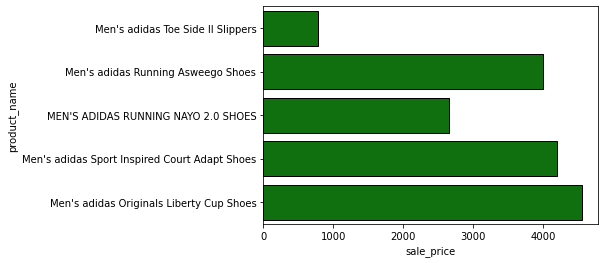

In [85]:
sns.barplot(x = 'sale_price', y = 'product_name', data = top_adidas, color = 'green', edgecolor='black')

In [225]:
adidas_reviews = pd.read_sql('''SELECT reviews FROM data
                            WHERE brand == 'Adidas' ''', data_shoe_conn)
adidas_reviews

,reviews
0,41
1,24
2,37
3,35
4,72
...,...
2620,47
2621,30
2622,87
2623,6


In [226]:
Nike_reviews = pd.read_sql('''SELECT reviews FROM data
                            WHERE brand == 'Nike' ''', data_shoe_conn)
Nike_reviews

,reviews
0,0
1,0
2,0
3,0
4,0
...,...
638,1
639,0
640,1
641,4


In [86]:
reviews_query = pd.read_sql('''SELECT avg(reviews) as avg_reviews, brand 
                            FROM data
                            GROUP BY brand''', data_shoe_conn)
reviews_query

,avg_reviews,brand
0,48.725714,Adidas
1,7.181960,Nike


<AxesSubplot:xlabel='avg_reviews', ylabel='brand'>

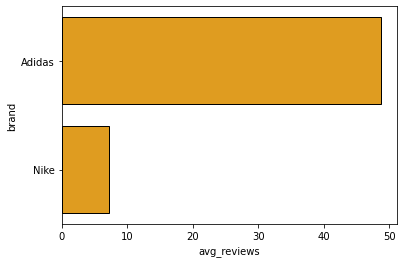

In [88]:
sns.barplot(x = 'avg_reviews', y = 'brand', data = reviews_query, color = 'orange', edgecolor='black')

In [230]:
price_query = pd.read_sql('''SELECT listing_price, sale_price, brand 
                            FROM data''', data_shoe_conn)
price_query

,listing_price,sale_price,brand
0,14999,7499,Adidas
1,7599,3799,Adidas
2,999,599,Adidas
3,6999,3499,Adidas
4,7999,3999,Adidas
...,...,...,...
3263,15995,12797,Nike
3264,4995,3497,Nike
3265,8495,5947,Nike
3266,0,16995,Nike


In [235]:
price_csv = price_query.to_csv('price.csv')
discount_csv = discount_query.to_csv('discount.csv')
reviews_csv = reviews_query.to_csv('reviews.csv')
top_nike_csv = top_nike.to_csv('top_nike.csv')
top_adidas_csv = top_adidas.to_csv('top_adidas.csv')